# Deep Learning

## HW1- problem 2- Support Vector Machine (100 + 10 pts)

### Please fill this part


1.   Full Name: Ali Fakhar 
2.   Student Number: 400206335

## important:
"some parts are based on some ducumentations and also some examples tha I have fined" Helpful videos of Prof. Soleimani at CE department also were fruitful.


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [3]:
# You are not allowed to import other packages.
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

import cvxopt

#### About the Data:
Heart diseases, also known as [Cardiovascular diseases (CVDs)](https://en.wikipedia.org/wiki/Cardiovascular_disease), are the first cause of death worldwide, taking an estimated 17.9 million lives each year which is about 32% of all deaths all over the world. 

In the present HomeWork, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

For this perpose, `Heart_Disease_Dataset.csv` file can be used that is attached to the HomeWork folder. Use `Dataset_Description.pdf` for more detail.


In [5]:
df = pd.read_csv("/home/ali/Desktop/data/Heart_Disease_Dataset.csv") 
df = np.array(df)

### Pre-Processing - (40 pts)

#### Exploratory Data Analysis (EDA):
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

shape of dataset is:  (1190, 12)
this dataset has not missing value
ballanced:  False
--------------------- Plots --------------------------
350 211


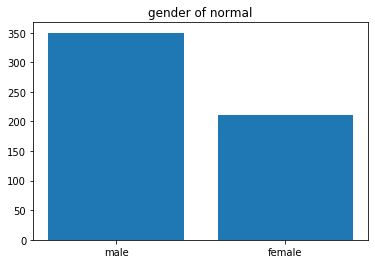

559 70


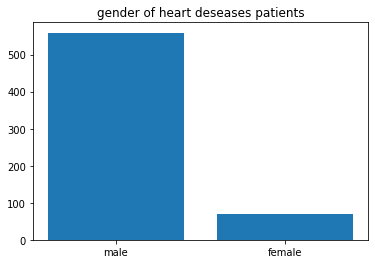

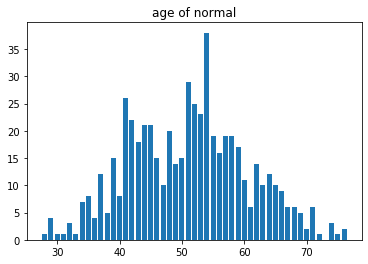

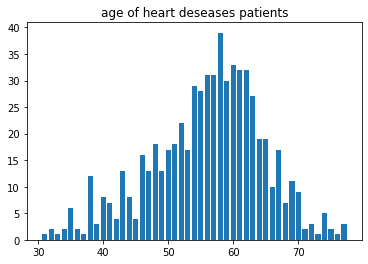

In [6]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
###############################################################################
shape = df.shape
print("shape of dataset is: " , shape)

###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################
missings = None
if True in np.isnan(df):
    missings = True
    print("this dataset has missing value")
else:
    missings = False
    print("this dataset has not missing value")
    
# print("this dataset has/has not missing value")

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
## If the difference between 2 classes was less than 100 for our dataset,    ##
## it is called "ballanced".                                                 ##
###############################################################################
z = 0
for i in range(min(df.shape)):
    for j in range(i, min(df.shape)):
        z = max(max(abs((df[:,i]-df[:,j]))),z)

print("ballanced: ", not(z>100))
# print("ballanced: True/False")
###############################################################################
## TODO: plot the age distirbution and gender distrbution for both normal    ##
## and heart diseses patients.(4 plots)                                      ##
###############################################################################
print("--------------------- Plots --------------------------")
import matplotlib.pyplot as plt
gender_normal = [x for i ,x in enumerate(df[:,1]) if df[i,11] == 0]
gender_abnormal = [x for i ,x in enumerate(df[:,1]) if df[i,11] == 1]
age_normal = [x for i ,x in enumerate(df[:,0]) if df[i,11] == 0]
age_abnormal = [x for i ,x in enumerate(df[:,0]) if df[i,11] == 1]
names = {1:"male", 0:"female"}
# plt.subplot(4, 1, 1)
men = len([i for i in gender_normal if i==1])
women = len([i for i in gender_normal if i==0])
print(men,women)
# plt.bar(names.values(), [men/(men+women) , women/(men+women)])
plt.bar(names.values(), [men , women])

plt.title('gender of normal')
plt.show()
# plt.subplot(4, 1, 2)
men = len([i for i in gender_abnormal if i==1])
women = len([i for i in gender_abnormal if i==0])
print(men,women)
plt.bar(names.values(), [men , women])
# plt.bar(names.values(), [men/(men+women) , women/(men+women)])
plt.title('gender of heart deseases patients')
plt.show()
# plt.subplot(4, 1, 3)
agenormal = dict()
for i in age_normal:
    if i in agenormal:
        agenormal[i] += 1
    else:
        agenormal[i] = 1
plt.bar(agenormal.keys(), agenormal.values())
plt.title('age of normal')
plt.show()
# plt.subplot(4, 1, 4)
ageabnormal = dict()
for i in age_abnormal:
    if i in ageabnormal:
        ageabnormal[i] += 1
    else:
        ageabnormal[i] = 1
plt.bar(ageabnormal.keys(), ageabnormal.values())
plt.title('age of heart deseases patients')
plt.show()


#### Question 1: What do you conclude from the plots?
#### Answer:

As you can see, male are more probable to have heart deseases. The other point is that; based on the diagram of "age of heart deseaes patients, as humans get older, the are more probable to heart problems.

#### Outlier Detection & Removal:
We will filter ouliers using Z-test.

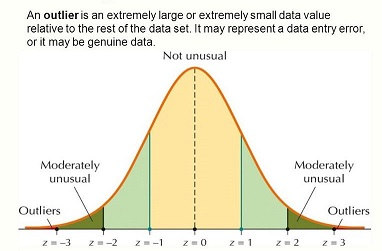

Z-test formula:
\begin{equation*}
    Z = \bigg|\frac {x - mu} {std}\bigg|
\end{equation*}

In [7]:
################################################################################
## TODO: Suppose that, based on our prior knowledge, we know some columns have##
## outliers. Calculate z-score for each featuer and determine the outliers    ##
## with threshold=3, then eliminate them. Target dataframe has(1173,12)shape. ##
################################################################################
columns = ["age","resting bp s","cholesterol","max heart rate"]
threshold = 3
df = pd.read_csv("/home/ali/Desktop/data/Heart_Disease_Dataset.csv") 

for column in columns:
    df = df.drop(df[(abs((df[column]-df[column].mean())/df[column].std())>threshold)].index)

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.


In [8]:
print(df)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [9]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized. type of features is ##
## determined in dataset description file.                                    ##
################################################################################
col = ["oldpeak", "max heart rate", "cholesterol", "resting bp s", "age" ]
for column in col:
    df[column] = (df[column] -df[column].min())/(df[column].max()-df[column].min())
    
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

### SVM - (60 pts)

#### spliting data

In [10]:
# The original dataset labels is 0 and 1 and in the following code we change it to -1 and 1. 
df.target.replace(0 , -1 , inplace = True) 

# Turn pandas dataframe to numpy array type
df = df.to_numpy()

# Splitting data into train and test part. 70% for train and 30% for test
train = df[:int(len(df) * 0.7)]
test = df[int(len(df) * 0.7):]

# Getting features 
X_train = train[: , :-1]
y_train = train[: , -1]

# Getting labels
X_test = test[: , :-1]
y_test = test[: , -1]

# shapes should be: 
# Train: (821, 11) (821,)
# Test: (352, 11) (352,)
print("Train: ", X_train.shape ,y_train.shape)
print("Test: " ,X_test.shape ,y_test.shape)


Train:  (821, 11) (821,)
Test:  (352, 11) (352,)


#### SVM Using sklearn:
Use the standard libarary SVM classifier (SVC) on the training data, and then test the classifier on the test data. You will need to call SVM with 3 kernels: (1) Linear, (2) Polynomial and (3) RBF. You can change C to achive better results. For "RBF" find "gamma" witch takes 90% accuracy, at least. For polynomial kernel you are allowed to change "degree" to find best results.

For each kernel, reportting the followings is required:
Accuracy, Precision, Recall, F1score.

In [11]:
def classification_report(y_true, y_pred):
    #################################################################################
    ## TODO: Define a function that returns the followings:                        ##
    ## Accuracy, Precision, Recall, F1score.                                       ##
    #################################################################################
    TP = sum(y_pred[ y_pred == 1] == y_true[ y_pred == 1])
    TN = sum(y_pred[ y_pred == -1] == y_true[ y_pred == -1])
    FP = sum( y_pred == 1) - TP
    FN = sum( y_pred == -1) - TN
    Accuracy = (TN + TP)/(TP + TN + FP + FN)
    Precision = (TP)/(TP + FP)
    Recall = (TP)/(TP + FN)
    F1score = (TP)/(TP + (1/2)*(FP + FN))
    
    #################################################################################
    #                                 END OF YOUR CODE                              #
    #################################################################################
    return Accuracy, Precision, Recall, F1score

In [26]:
#########################################################################################
## TODO: Use svm of sklearn package (imported above) with 3 kernels.                   ##
## You should define model, fit using X_train, predict using X_test.                   ##
## your predictions known as y_pred.                                                   ##
## then use classification_report function to evaluate model.                          ##
#########################################################################################

# linear kernel
svclassifier = SVC(C = 1,kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

print("results of sklearn svm linear kernel:", classification_report(y_test, y_pred))



# polynomial kernel

svclassifier = SVC(C = 1, kernel= 'poly', degree = 5, coef0 = 0)
svclassifier.fit(X_train, y_train)
y_pred1 = svclassifier.predict(X_test)

print("results of sklearn svm polynomial kernel:", classification_report(y_test, y_pred))



# rbf kernel
svclassifier = SVC(C = 1, kernel= 'rbf', gamma = 13)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)


print("results of sklearn svm RBF kernel:", classification_report(y_test, y_pred))

#Due to the fact that we have acc more than 90 percent with increasing gamma we could control it, it means as
#we increase it, we increase the variances and we make more complex boundaries but it loss its generality
#########################################################################################
#                                      END OF YOUR CODE                                 #
#########################################################################################

results of sklearn svm linear kernel: (0.7869318181818182, 0.7756410256410257, 0.7515527950310559, 0.7634069400630915)
results of sklearn svm polynomial kernel: (0.7869318181818182, 0.7756410256410257, 0.7515527950310559, 0.7634069400630915)
results of sklearn svm RBF kernel: (0.9034090909090909, 0.8628571428571429, 0.937888198757764, 0.8988095238095238)


#### SVM:
Now that you know how the standard library SVM works on the dataset, attempt to implement your own version of SVM. Implement SVM using Quadratic Programming(QP) approach. Remember that SVM objective fuction with QP is:

\begin{equation*}
    min_{\alpha}\quad\frac{1}{2}\alpha^T\,Q\,\alpha-1^T\,\alpha\\
    s.t.\qquad y^T\,\alpha=0,\,\alpha\ge0
\end{equation*}

where:
\begin{equation*}
    Q_{i,j}=y_i\,y_j\,\langle x_i\,,\,x_j\rangle
\end{equation*}

and:
\begin{equation*}
    \text{if}\;(\alpha_n>0)\;\text{then}\;x_n\;\text{is a  support vector}
\end{equation*}

For this perpose, complete the following code. You are allowed to use "cvxopt" package. It's an optimization package for Quadratic Programming. Below is the user's guide for the QP from CVXOPT:

[Quadratic Programming](https://cvxopt.org/userguide/coneprog.html#quadratic-programming)

In [30]:
# Hide cvxopt output
cvxopt.solvers.options["show_progress"] = False

#####################################################################################
## TODO: Use the information from the lecture slides to formulate the SVM          ##
## kernels. These kernel functions will be called in the SVM class.                ##
#####################################################################################


def linear_kernel(x1, x2, gamma=None , p = None, c0 = None):
    return np.dot(x1, x2)

def polynomial_kernel(x1, x2, p=5 , c0 = 1 , gamma = None):
    return (c0 + np.dot(x1, x2)) ** p

def rbf_kernel(x1, x2, gamma=13.0 , p = None, c0 = None):
    return np.exp(-1* gamma * np.linalg.norm(x1-x2)**2 )
#####################################################################################
#                                   END OF YOUR CODE                                #
#####################################################################################


class MySVM(object):
    def __init__(self, kernel=linear_kernel, C=None, p= 3, c0= 1 , gamma= 1):
        self.kernel = kernel
        self.C = C
        self.p = p
        self.c0 = c0
        self.gamma = gamma
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):

        n_samples, n_features = X.shape

        #####################################################################################
        ## TODO: Compute Gram matrix "K" for the given kernel.                             ##
        #####################################################################################        
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j], c0 = self.c0, p = self.p, gamma = self.gamma)

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################


        #####################################################################################
        ## TODO: Setup SVM objective function in QP form (Notation from attached link).    ##
        ## Guidance: G and h have defferent definition if C is used or not.                ##
        #####################################################################################
#         P = None
#         q = np.full((n_samples, 1), -1)
#         A = (np.array(y)).T
#         b = 0
#         G = np.eye(n_samples)
#         h = np.zeros((n_samples, 1))
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)
        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        alpha = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = alpha > 1e-5

        #this will actually give the indices of the support vectors
        ind = np.arange(len(alpha))[sv]

        # get alphas of support vector , Xs and ys too.
        self.alpha = alpha[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        #####################################################################################
        ## TODO: Compute the Intercept b and Weight vector w.                              ##
        #####################################################################################
        # Intercept
        self.b = 0
        for n in range(len(self.alpha)):
            self.b = self.b + self.sv_y[n]
            self.b = self.b - np.sum(self.alpha * self.sv_y * K[ind[n],sv])
        self.b = self.b / len(self.alpha)
        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.alpha)):
                self.w = self.w + self.alpha[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None #Guidance: for non-linear case this should be None. (do not change)
        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

    def predict(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
        #####################################################################################
        ## TODO: For non-linear case, implement the kernel trick to predict the label.     ##
        #####################################################################################
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for alpha, sv_y, sv in zip(self.alpha, self.sv_y, self.sv):
                    s = s + alpha * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s

            return np.sign(y_predict + self.b)

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

In [32]:
###################################################################################
## TODO: define 3 model same as previous part (SVM Using sklearn) and evaluate   ##
## them. Note that for comaparing your result with that part for each kernel use ##
## same parameters in both parts.                                                ##
###################################################################################

# linear kernel

svclassifier = MySVM(kernel=linear_kernel, C = 1, gamma = 13)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
# y_pred
print("results of MySVM linear kernel:", classification_report(y_test , y_pred))


# polynomial kernel

svclassifier = MySVM(kernel=polynomial_kernel, C = 1, gamma = 13)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

print("results of MySVM polynomial kernel:", classification_report(y_test , y_pred))


# rbf kernel
svclassifier = MySVM(kernel=rbf_kernel, C = 1, gamma = 13)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print("results of Mysvm RBF kernel:", classification_report(y_test , y_pred))

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


results of MySVM linear kernel: (nan, nan, nan, nan)
results of MySVM polynomial kernel: (0.5823863636363636, 0.5406976744186046, 0.577639751552795, 0.5585585585585585)
results of Mysvm RBF kernel: (0.9005681818181818, 0.8705882352941177, 0.9192546583850931, 0.8942598187311178)


#### Question 2: Report best results.



1.  Best kernel: 
2.  Best Accuracy: 




## soloution
best kernel is "RBF" and its acc is about 90 percent

### Bonus Score - (10pts)

In this step you can check other kernel functions or change parameters or any idea to get better result in compare with last section's results.

In [36]:
#As I have mentioned one soloution is with changing the value of gamma, which has some effects on variances
#in other word, with increasing the value of that shape of boundaries will be more cimplex and it may loos its generality.
#choosing data randomly are also important, to be sure about our model. Also we could use other kernels.
# we would change the value of gamma and will se the effect of that.
for i in [ 4 , 5 , 6, 15 ]:
    svclassifier = MySVM(kernel=rbf_kernel, C = 1, gamma = i)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print("results of Mysvm RBF kernel:", classification_report(y_test , y_pred),"the value of gamma is:", i)

results of Mysvm RBF kernel: (0.9034090909090909, 0.8628571428571429, 0.937888198757764, 0.8988095238095238) the value of gamma is: 4
results of Mysvm RBF kernel: (0.9261363636363636, 0.9041916167664671, 0.937888198757764, 0.9207317073170732) the value of gamma is: 5
results of Mysvm RBF kernel: (0.9204545454545454, 0.893491124260355, 0.937888198757764, 0.9151515151515152) the value of gamma is: 6
results of Mysvm RBF kernel: (0.8977272727272727, 0.8698224852071006, 0.9130434782608695, 0.8909090909090909) the value of gamma is: 15


In [37]:
for i in [ 1,4 , 6, 15 ]:
    svclassifier = MySVM(kernel=rbf_kernel, C = i, gamma = 5)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print("results of Mysvm RBF kernel:", classification_report(y_test , y_pred),"the value of C is:", i)

results of Mysvm RBF kernel: (0.9261363636363636, 0.9041916167664671, 0.937888198757764, 0.9207317073170732) the value of C is: 1
results of Mysvm RBF kernel: (0.90625, 0.8950617283950617, 0.9006211180124224, 0.8978328173374613) the value of C is: 4
results of Mysvm RBF kernel: (0.9034090909090909, 0.8944099378881988, 0.8944099378881988, 0.8944099378881988) the value of C is: 6
results of Mysvm RBF kernel: (0.8835227272727273, 0.8658536585365854, 0.8819875776397516, 0.8738461538461538) the value of C is: 15


The other term is "C" which seem s that related to regularizations (based on documentation) with that loop we consider that the best choice among that values is c = 1 , also gamma = 5 will be good choice; however we should choose our data in three parts of test, train and validation randomly, but as a rule of thumb we learn that with gamma about 5 we may have a good method for our problem on this dataset.